In [1]:
print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #plotting
import seaborn as sns #good visualizing
import os
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ShuffleSplit
from IPython.display import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd

## Data preparation

In [155]:
student = pd.read_csv("student-por.csv" ,sep=';')
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [66]:
student.columns = ['school','sex','age','address','family_size','parents_status','mother_education','father_education',
           'mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support',
          'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
          'free_time','go_out','weekday_alcohol_usage','weekend_alcohol_usage','health','absences','period1_score','period2_score','final_score']

In [67]:
# convert final_score to categorical variable # Good:15~20 Fair:10~14 Poor:0~9
student['final_grade'] = 'na'
student.loc[(student.final_score >= 15) & (student.final_score <= 20), 'final_grade'] = 'good' 
student.loc[(student.final_score >= 10) & (student.final_score <= 14), 'final_grade'] = 'fair' 
student.loc[(student.final_score >= 0) & (student.final_score <= 9), 'final_grade'] = 'poor' 
student.head(5)

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_score,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,fair
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,fair
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,fair
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,fair
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,fair


In [98]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   school                 649 non-null    object
 1   sex                    649 non-null    object
 2   age                    649 non-null    int64 
 3   address                649 non-null    object
 4   family_size            649 non-null    object
 5   parents_status         649 non-null    object
 6   mother_education       649 non-null    int64 
 7   father_education       649 non-null    int64 
 8   mother_job             649 non-null    object
 9   father_job             649 non-null    object
 10  reason                 649 non-null    object
 11  guardian               649 non-null    object
 12  commute_time           649 non-null    int64 
 13  study_time             649 non-null    int64 
 14  failures               649 non-null    int64 
 15  school_support         

C:\Users\12619\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Student')

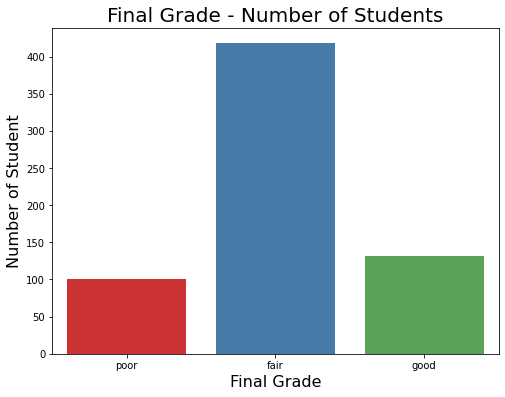

In [68]:
# Final Grade Countplot
plt.figure(figsize=(8,6))
sns.countplot(student.final_grade, order=["poor","fair","good"], palette='Set1')
plt.title('Final Grade - Number of Students',fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Number of Student', fontsize=16)

In [69]:
# create dataframe dfd for classification
data = student.copy()
data = data.drop([ 'final_score'], axis=1)

In [70]:
# label encode final_grade
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data.final_grade = le.fit_transform(data.final_grade)

In [71]:
# dataset train_test_split
X = data.drop('final_grade',axis=1)
y = data.final_grade

In [72]:
def normalization(X):
    mean = np.mean(X)
    std = np.std(X)
    X_t = (X - mean)/std
    return X_t

In [73]:
#Train and Test splitting of data     
def train_test(X_t, y):
    x_train, x_test, y_train, y_test = train_test_split(X_t, y, test_size = 0.3, random_state = 42)
    print("Train:",len(x_train), " - Test:", len(x_test))
    return x_train, x_test, y_train, y_test

In [74]:
#Normalization
X_t = normalization(X)
print("X_t:", X_t.shape)

#Train and Test splitting of data 
x_train, x_test, y_train, y_test = train_test(X_t, y)

X_t: (649, 32)
Train: 454  - Test: 195


C:\Users\12619\anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3558: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [75]:
X = X_t
X=X.dropna(axis=1,how='all')

In [76]:
x_train=x_train.dropna(axis=1,how='all') 
x_test=x_test.dropna(axis=1,how='all') 
print(x_train.shape)

(454, 15)


## Decision Trees

In [77]:
#decision trees default model and time
import time
start = time.time()
tree_model = DecisionTreeClassifier(random_state=1).fit(x_train,y_train)
end = time.time()
time_train = end-start
print('train time =',time_train)

train time = 0.007999897003173828


In [78]:
start = time.time()
tree_pred = tree_model.predict(x_test)
end = time.time()
time_test = end-start
print('test time =',time_test)

test time = 0.0


In [79]:
score_train=tree_model.score(x_train,y_train)
score_test=tree_model.score(x_test,y_test)
print('training score = ',score_train,'test score = ',score_test)

training score =  1.0 test score =  0.9025641025641026


In [80]:
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,30,1)), 
            "min_samples_leaf": list(range(5,20,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(x_train, y_train)
# tree best estimator
tree_clf = grid_tree.best_estimator_
print("Best Parameters for Decision Tree: ", grid_tree.best_estimator_)
print("Best Score for Decision Tree: ", grid_tree.best_score_)
print("------------------------------------------")

Best Parameters for Decision Tree:  DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=6)
Best Score for Decision Tree:  0.892014652014652
------------------------------------------


In [81]:
#Apply cross validation to estimate the skills of models with 10 split with using best parameters
scores = cross_val_score(tree_clf, x_train, y_train, cv=10)
print("Mean Accuracy of Cross Validation: %", round(scores.mean()*100,2))
print("Std of Accuracy of Cross Validation: %", round(scores.std()*100))
print("------------------------------------------")
#Predict the test data as selected classifier
clf_prediction = tree_clf.predict(x_test)
clf1_accuracy = sum(y_test == clf_prediction)/len(y_test)
print("Accuracy of decision trees:",clf1_accuracy*100)

#print confusion matrix and accuracy score before best parameters
clf1_conf_matrix = confusion_matrix(y_test, clf_prediction)
print("Confusion matrix of decision trees:\n", clf1_conf_matrix)
print("==========================================")

Mean Accuracy of Cross Validation: % 88.53
Std of Accuracy of Cross Validation: % 5
------------------------------------------
Accuracy of decision trees: 89.23076923076924
Confusion matrix of decision trees:
 [[113   2  10]
 [  1  43   0]
 [  8   0  18]]


In [82]:
start = time.time()
tree_model_prune = DecisionTreeClassifier(random_state=1,
                                   max_depth=9,
                                   min_samples_leaf=6).fit(x_train,y_train)
end = time.time()
time_train = end-start
print('After pruning, train time =',time_train)

After pruning, train time = 0.008003473281860352


In [83]:
start = time.time()
tree_pred = tree_model_prune.predict(x_test)
end = time.time()
time_test = end-start
print('After pruning, test time =',time_test)

After pruning, test time = 0.0


In [84]:
score_train=tree_model_prune.score(x_train,y_train)
score_test=tree_model_prune.score(x_test,y_test)
print('training score = ',score_train,'test score = ',score_test)

training score =  0.9229074889867841 test score =  0.9128205128205128


In [85]:
#Plotting the learning curve
# score curves, each time with 30% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)

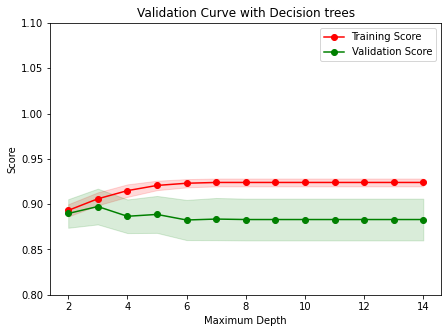

In [86]:
# Vary the max_depth parameter from 1 to 10
max_depth = np.arange(2,15,1)

# Calculate the training and testing scores
train_scores, test_scores = validation_curve(tree_model_prune, X, y, \
    param_name = "max_depth", param_range = max_depth, cv = cv)

    # Find the mean and standard deviation for smoothing
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
plt.figure(figsize=(7, 5))
plt.title('Validation Curve with Decision trees')
plt.plot(max_depth, train_mean, 'o-', color = 'r', label = 'Training Score')
plt.plot(max_depth, test_mean, 'o-', color = 'g', label = 'Validation Score')
plt.fill_between(max_depth, train_mean - train_std, \
    train_mean + train_std, alpha = 0.15, color = 'r')
plt.fill_between(max_depth, test_mean - test_std, \
    test_mean + test_std, alpha = 0.15, color = 'g')
    
 # Visual aesthetics
plt.legend(loc = 'best')
plt.xlabel('Maximum Depth')
plt.ylabel('Score')
plt.ylim([0.8,1.1])
plt.show()

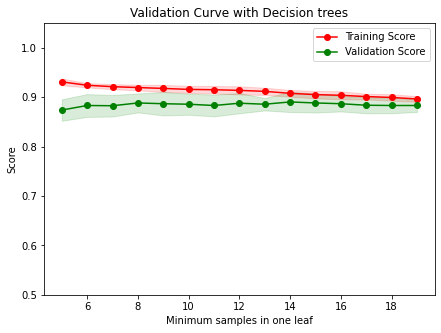

In [88]:
min_samples_leaf = np.arange(5,20,1)

# Calculate the training and testing scores
train_scores, test_scores = validation_curve(tree_model_prune, X, y, \
    param_name = "min_samples_leaf", param_range = min_samples_leaf, cv = cv)

# Find the mean and standard deviation for smoothing
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(7, 5))
plt.title('Validation Curve with Decision trees')
plt.plot(min_samples_leaf, train_mean, 'o-', color = 'r', label = 'Training Score')
plt.plot(min_samples_leaf, test_mean, 'o-', color = 'g', label = 'Validation Score')
plt.fill_between(min_samples_leaf, train_mean - train_std, \
    train_mean + train_std, alpha = 0.15, color = 'r')
plt.fill_between(min_samples_leaf, test_mean - test_std, \
    test_mean + test_std, alpha = 0.15, color = 'g')
    
# Visual aesthetics
plt.legend(loc = 'best')
plt.xlabel('Minimum samples in one leaf')
plt.ylabel('Score')
plt.ylim([0.5,1.05])
plt.show()

Text(0.5, 1.0, 'Scalability of the model')

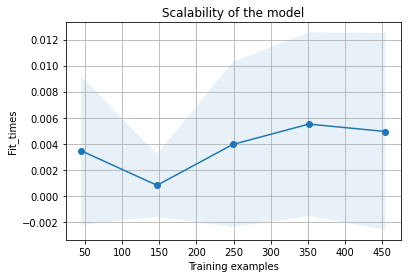

In [91]:
train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(tree_model_prune, X, y, cv=cv, 
                                        n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5),return_times=True)

fit_times_mean = np.mean(fit_times,axis = 1)
fit_times_std = np.std(fit_times,axis = 1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()
plt.plot(train_sizes, fit_times_mean, 'o-')
plt.fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
plt.xlabel("Training examples")
plt.ylabel("Fit_times")
plt.title("Scalability of the model")

Text(0.5, 1.0, 'Learning curve of Decision trees')

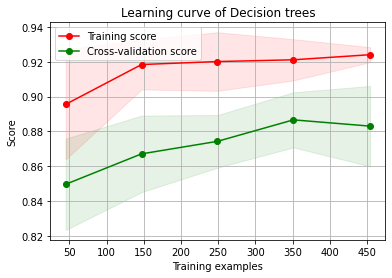

In [92]:
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning curve of Decision trees")

## Adaboost Classifier

In [93]:
from sklearn.ensemble import AdaBoostClassifier
start = time.time()
ada_boost = AdaBoostClassifier(tree_model_prune,random_state=1)
ada_boost.fit(x_train, y_train)
end = time.time()
time_train = end-start
print('train time =',time_train)

train time = 0.12463712692260742


In [94]:
start = time.time()
ada_pred = ada_boost.predict(x_test)
end = time.time()
time_test = end-start
print('test time =',time_test)

test time = 0.014371633529663086


C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [95]:
score_train = ada_boost.score(x_train,y_train)
score_test = ada_boost.score(x_test,y_test)
print('training score = ',score_train,'test score = ',score_test)

training score =  1.0 test score =  0.8974358974358975


C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [96]:
ada_params = {'n_estimators':range(50,500,50),"learning_rate": [1,0.5,0.1,0.05,0.02,0.01]}

grid_ada = GridSearchCV(ada_boost,ada_params,cv=cv) 
grid_ada.fit(x_train,y_train) 

C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\sit

C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\sit

C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\sit

C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\sit

C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\sit

C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\sit

C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\sit

C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\sit

C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\sit

C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\sit

C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\sit

C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\sit

C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\sit

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.3, train_size=None),
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=9,
                                                                                min_samples_leaf=6,
                                                                                random_state=1),
                                          random_state=1),
             param_grid={'learning_rate': [1, 0.5, 0.1, 0.05, 0.02, 0.01],
                         'n_estimators': range(50, 500, 50)})

In [99]:
# adaboost best estimator
ada_clf = grid_ada.best_estimator_
print("Best Parameters for AdaBoost Classifier: ", grid_ada.best_estimator_)
print("Best Score for AdaBoost Classifier: ", grid_ada.best_score_)
print("------------------------------------------")

Best Parameters for AdaBoost Classifier:  AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=9,
                                                         min_samples_leaf=6,
                                                         random_state=1),
                   learning_rate=1, n_estimators=200, random_state=1)
Best Score for AdaBoost Classifier:  0.8722627737226277
------------------------------------------


In [100]:
scores = cross_val_score(ada_clf, x_train, y_train, cv=10)
print("Mean Accuracy of Cross Validation: %", round(scores.mean()*100,2))
print("Std of Accuracy of Cross Validation: %", round(scores.std()*100))
print("------------------------------------------")
#Predict the test data as selected classifier
clf_prediction = ada_clf.predict(x_test)
clf1_accuracy = sum(y_test == clf_prediction)/len(y_test)
print("Accuracy of Adaboost:",clf1_accuracy*100)

#print confusion matrix and accuracy score before best parameters
clf1_conf_matrix = confusion_matrix(y_test, clf_prediction)
print("Confusion matrix of Adaboost:\n", clf1_conf_matrix)
print("==========================================")

C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\sit

Mean Accuracy of Cross Validation: % 87.0
Std of Accuracy of Cross Validation: % 6
------------------------------------------
Accuracy of Adaboost: 91.28205128205128
Confusion matrix of Adaboost:
 [[115   4   6]
 [  0  44   0]
 [  7   0  19]]


C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [102]:
start = time.time()
ada_boost_grid = AdaBoostClassifier(tree_model_prune,random_state=1,n_estimators=200,learning_rate=1).fit(x_train,y_train)
end = time.time()
time_train = end-start
print('When n_estimators=200 and learning_rate=1, train time =',time_train)

When n_estimators=200 and learning_rate=1, train time = 0.5118763446807861


In [103]:
start = time.time()
ada_boost_grid_pred = ada_boost_grid.predict(x_test)
end = time.time()
time_test = end-start
print('When n_estimators=200 and learning_rate=1, test time =',time_test)

When n_estimators=200 and learning_rate=1, test time = 0.040015220642089844


C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [104]:
score_train = ada_boost_grid.score(x_train,y_train)
score_test = ada_boost_grid.score(x_test,y_test)
print('training score = ',score_train,'test score = ',score_test)

training score =  1.0 test score =  0.9128205128205128


C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\sit

C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\sit

C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\sit

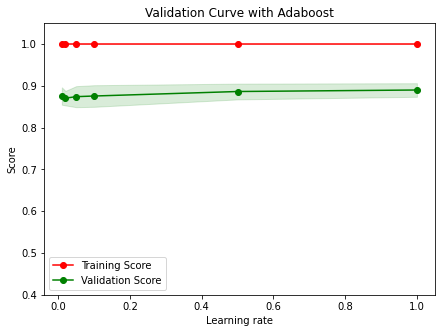

In [107]:
learning_rate = [1,0.5,0.1,0.05,0.02,0.01]

# Calculate the training and testing scores
train_scores, test_scores = validation_curve(ada_boost_grid, X, y, \
    param_name = "learning_rate", param_range = learning_rate, cv = cv)

    # Find the mean and standard deviation for smoothing
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
plt.figure(figsize=(7, 5))
plt.title('Validation Curve with Adaboost')
plt.plot(learning_rate, train_mean, 'o-', color = 'r', label = 'Training Score')
plt.plot(learning_rate, test_mean, 'o-', color = 'g', label = 'Validation Score')
plt.fill_between(learning_rate, train_mean - train_std, \
    train_mean + train_std, alpha = 0.15, color = 'r')
plt.fill_between(learning_rate, test_mean - test_std, \
    test_mean + test_std, alpha = 0.15, color = 'g')
    
 # Visual aesthetics
plt.legend(loc = 'best')
plt.xlabel('Learning rate')
plt.ylabel('Score')
plt.ylim([0.4,1.05])
plt.show()

Text(0.5, 1.0, 'Scalability of the Adaboost model')

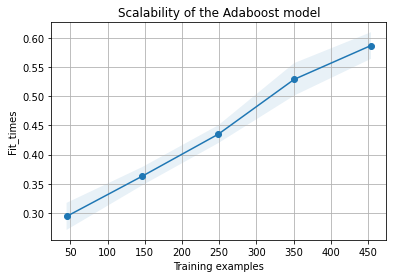

In [109]:
train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(ada_boost_grid, X, y, cv=cv, 
                                        n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5),return_times=True)

fit_times_mean = np.mean(fit_times,axis = 1)
fit_times_std = np.std(fit_times,axis = 1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()
plt.plot(train_sizes, fit_times_mean, 'o-')
plt.fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
plt.xlabel("Training examples")
plt.ylabel("Fit_times")
plt.title("Scalability of the Adaboost model")

Text(0.5, 1.0, 'Learning curve of Adaboost')

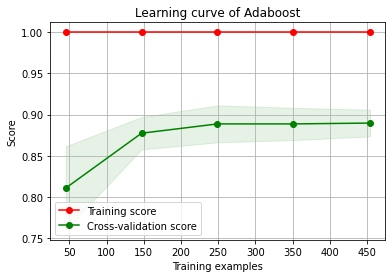

In [110]:
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning curve of Adaboost")

## Support Vector Machine

In [112]:
from sklearn.svm import SVC
start = time.time()
svm_model = SVC()
svm_model.fit(x_train, y_train)
end = time.time()
time_train = end-start
print('train time =',time_train)

train time = 0.022848129272460938


In [113]:
start = time.time()
svm_pred = svm_model.predict(x_test)
end = time.time()
time_test = end-start
print('test time =',time_test)

test time = 0.010328054428100586


In [114]:
score_train = svm_model.score(x_train,y_train)
score_test = svm_model.score(x_test,y_test)
print('training score = ',score_train,'test score = ',score_test)

training score =  0.9295154185022027 test score =  0.8923076923076924


In [115]:
svc_params = {'C':[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
                      'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                               1000.0],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']})

In [116]:
svc = grid_svc.best_estimator_
print("Best Parameters for SVM: ", grid_svc.best_estimator_)
print("Best Score for SVM: ", grid_svc.best_score_)
print("------------------------------------------")

Best Parameters for SVM:  SVC(C=10.0, kernel='linear')
Best Score for SVM:  0.8744322344322345
------------------------------------------


In [117]:
scores = cross_val_score(svc, x_train, y_train, cv=10)
print("Mean Accuracy of Cross Validation: %", round(scores.mean()*100,2))
print("Std of Accuracy of Cross Validation: %", round(scores.std()*100))
print("------------------------------------------")
#Predict the test data as selected classifier
clf_prediction = svc.predict(x_test)
clf1_accuracy = sum(y_test == clf_prediction)/len(y_test)
print("Accuracy of SVM:",clf1_accuracy*100)

#print confusion matrix and accuracy score before best parameters
clf1_conf_matrix = confusion_matrix(y_test, clf_prediction)
print("Confusion matrix of SVM:\n", clf1_conf_matrix)
print("==========================================")

Mean Accuracy of Cross Validation: % 87.89
Std of Accuracy of Cross Validation: % 4
------------------------------------------
Accuracy of SVM: 90.25641025641026
Confusion matrix of SVM:
 [[113   3   9]
 [  3  41   0]
 [  4   0  22]]


In [137]:
start = time.time()
svm_grid = SVC(kernel="linear",C=10.0).fit(x_train,y_train)
end = time.time()
time_train = end-start
print('When kernel = linear, C = 10, train time =',time_train)

When kernel = linear, C = 10, train time = 0.037715911865234375


In [119]:
start = time.time()
svm_grid_pred = svm_grid.predict(x_test)
end = time.time()
time_test = end-start
print('When kernel = linear, C = 10, train time =',time_test)

When kernel = linear, C = 10, train time = 0.008002519607543945


In [120]:
score_train = svm_grid.score(x_train,y_train)
score_test = svm_grid.score(x_test,y_test)
print('training score = ',score_train,'test score = ',score_test)

training score =  0.9162995594713657 test score =  0.9025641025641026


In [121]:
svm_grid = SVC(kernel="poly",C=10.0).fit(x_train,y_train)
score_train = svm_grid.score(x_train,y_train)
score_test = svm_grid.score(x_test,y_test)
print('training score = ',score_train,'test score = ',score_test)

training score =  0.9823788546255506 test score =  0.8564102564102564


In [122]:
svm_grid = SVC(kernel="sigmoid",C=10.0).fit(x_train,y_train)
score_train = svm_grid.score(x_train,y_train)
score_test = svm_grid.score(x_test,y_test)
print('training score = ',score_train,'test score = ',score_test)

training score =  0.76431718061674 test score =  0.841025641025641


In [123]:
svm_grid = SVC(kernel="rbf",C=10.0).fit(x_train,y_train)
score_train = svm_grid.score(x_train,y_train)
score_test = svm_grid.score(x_test,y_test)
print('training score = ',score_train,'test score = ',score_test)

training score =  0.9889867841409692 test score =  0.8666666666666667


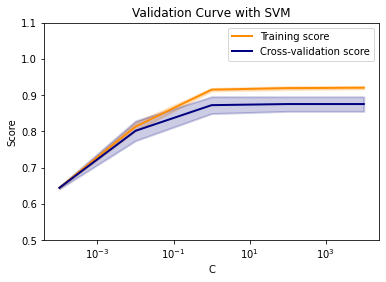

In [139]:
param_range = np.logspace(-4, 4, 5)

# Calculate the training and testing scores
train_scores, test_scores = validation_curve(
    svm_grid, X, y, param_name="C", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("C")
plt.ylabel("Score")
plt.ylim(0.5, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Text(0.5, 1.0, 'Performance of the model')

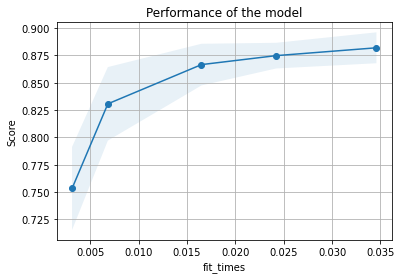

In [140]:
train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(svm_grid, X, y, cv=cv,n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5),return_times=True)

fit_times_mean = np.mean(fit_times,axis = 1)
fit_times_std = np.std(fit_times,axis = 1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()
plt.plot(fit_times_mean, test_scores_mean, 'o-')
plt.fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
plt.xlabel("fit_times")
plt.ylabel("Score")
plt.title("Performance of the model")

## K nearest neighbors

In [142]:
from sklearn.neighbors import KNeighborsClassifier
start = time.time()
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
end = time.time()
time_train = end-start
print('train time =',time_train)

train time = 0.008000612258911133


In [143]:
start = time.time()
knn_pred = knn_model.predict(x_test)
end = time.time()
time_test = end-start
print('test time =',time_test)

test time = 0.01515817642211914


C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [144]:
score_train = knn_model.score(x_train,y_train)
score_test = knn_model.score(x_test,y_test)
print('training score = ',score_train,'test score = ',score_test)

training score =  0.8193832599118943 test score =  0.8205128205128205


C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [135]:
knn_params = {'n_neighbors':list(range(2,15,1)),'weights': ['disdance', 'uniform']}
grid_knn = GridSearchCV(KNeighborsClassifier(), knn_params)
grid_knn.fit(x_train, y_train)

C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\

C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14],
                         'weights': ['disdance', 'uniform']})

In [145]:
knn = grid_knn.best_estimator_
print("Best Parameters for KNN: ", grid_knn.best_estimator_)
print("Best Score for KNN: ", grid_knn.best_score_)
print("------------------------------------------")

Best Parameters for KNN:  KNeighborsClassifier(n_neighbors=7)
Best Score for KNN:  0.7732356532356531
------------------------------------------


In [146]:
scores = cross_val_score(knn, x_train, y_train, cv=10)
print("Mean Accuracy of Cross Validation: %", round(scores.mean()*100,2))
print("Std of Accuracy of Cross Validation: %", round(scores.std()*100))
print("------------------------------------------")
#Predict the test data as selected classifier
clf_prediction = knn.predict(x_test)
clf1_accuracy = sum(y_test == clf_prediction)/len(y_test)
print("Accuracy of KNN:",clf1_accuracy*100)

#print confusion matrix and accuracy score before best parameters
clf1_conf_matrix = confusion_matrix(y_test, clf_prediction)
print("Confusion matrix of KNN:\n", clf1_conf_matrix)
print("==========================================")

Mean Accuracy of Cross Validation: % 77.3
Std of Accuracy of Cross Validation: % 3
------------------------------------------
Accuracy of KNN: 81.02564102564102
Confusion matrix of KNN:
 [[118   4   3]
 [ 14  30   0]
 [ 16   0  10]]


C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\

In [147]:
start = time.time()
knn_grid = KNeighborsClassifier(n_neighbors=7,weights='uniform').fit(x_train,y_train)
end = time.time()
time_train = end-start
print('When n_neighbors=7, weights = uniform, train time =',time_train)

When n_neighbors=7, weights = uniform, train time = 0.008009910583496094


In [149]:
start = time.time()
knn_grid_pred = knn_grid.predict(x_test)
end = time.time()
time_test = end-start
print('When n_neighbors=7, weights = uniform, test time =',time_test)

When n_neighbors=7, weights = uniform, test time = 0.013119220733642578


C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [150]:
score_train = grid_knn.score(x_train,y_train)
score_test = grid_knn.score(x_test,y_test)
print('training score = ',score_train,'test score = ',score_test)

training score =  0.8083700440528634 test score =  0.8102564102564103


C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\

C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\

C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\

C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\

C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\

C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\12619\anaconda3\envs\

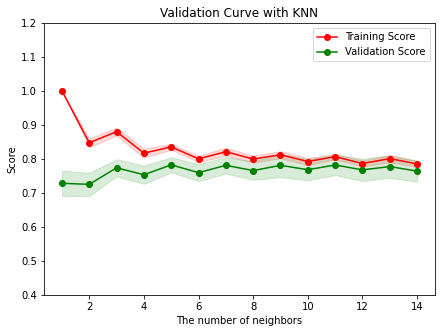

In [151]:
n_neighbors = np.arange(0,15,1)

# Calculate the training and testing scores
train_scores, test_scores = validation_curve(knn_grid, X, y, \
    param_name = "n_neighbors", param_range = n_neighbors, cv = cv)

    # Find the mean and standard deviation for smoothing
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
plt.figure(figsize=(7, 5))
plt.title('Validation Curve with KNN')
plt.plot(n_neighbors, train_mean, 'o-', color = 'r', label = 'Training Score')
plt.plot(n_neighbors, test_mean, 'o-', color = 'g', label = 'Validation Score')
plt.fill_between(n_neighbors, train_mean - train_std, \
    train_mean + train_std, alpha = 0.15, color = 'r')
plt.fill_between(n_neighbors, test_mean - test_std, \
    test_mean + test_std, alpha = 0.15, color = 'g')
    
 # Visual aesthetics
plt.legend(loc = 'best')
plt.xlabel('The number of neighbors')
plt.ylabel('Score')
plt.ylim([0.4,1.2])
plt.show()

Text(0.5, 1.0, 'Scalability of the KNN model')

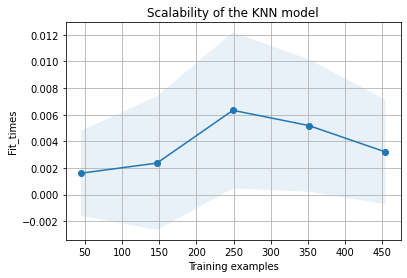

In [153]:
train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(knn_grid, X, y, cv=cv, 
                                        n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5),return_times=True)

fit_times_mean = np.mean(fit_times,axis = 1)
fit_times_std = np.std(fit_times,axis = 1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()
plt.plot(train_sizes, fit_times_mean, 'o-')
plt.fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
plt.xlabel("Training examples")
plt.ylabel("Fit_times")
plt.title("Scalability of the KNN model")

Text(0.5, 1.0, 'Learning curve of KNN')

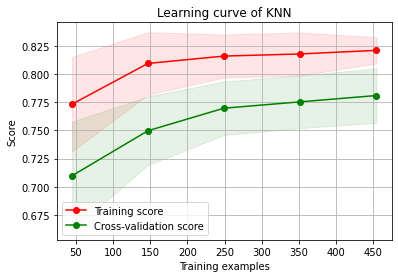

In [154]:
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning curve of KNN")